In [1]:
import sys
 
sys.path.append('..')

from sklearn.covariance import GraphicalLasso, graphical_lasso, EmpiricalCovariance, LedoitWolf
from GraphModels.model import DiagDominantPcorrModel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict


# Small check of DiagDominant model

In [2]:
model = DiagDominantPcorrModel(20, 0.1)

In [3]:
np.diag(model.precision) # Diagonal of the precision matrix is normalized

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [4]:
np.diag(model.covariance) # Diagonal of the covariance matrix is not normalized

array([1.00294342, 1.01262322, 1.04056994, 1.02193177, 1.15575825,
       1.09693628, 1.13274301, 1.00757287, 1.06260255, 1.063103  ,
       1.15294471, 1.08643576, 1.        , 1.04788524, 1.01349915,
       1.18447518, 1.08499975, 1.15816368, 1.00351317, 1.1376043 ])

In [5]:
np.count_nonzero(model.precision) - 20 # How many nonzero elements matrix contains (excluding diagonal)

46

In [6]:
20 * 19 * 0.1 # Expected value of nonzero element count

38.0

# Parameters

In [7]:
N = 20
n = 100
lambdas = np.linspace(0.01, 1, 50)
densities = np.arange(0.1, 1.1, step=0.1)

# Test 1
Comparison of previous GL algorithm that estimates covariance by itself and current GL algorithm that recieves the same estimation of covariance in terms of:
- Relative error in Frobenius norm between two estimated precision matrices.
- Relative error in Frobenius norm between estimated and true precision matrices.

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  2.50it/s]


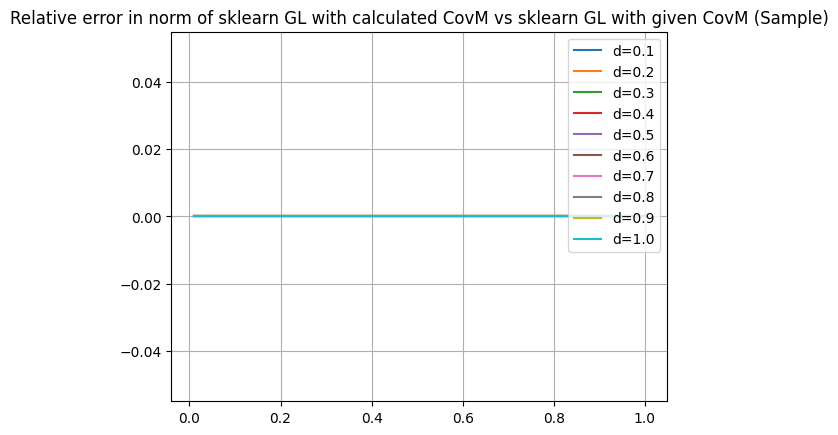

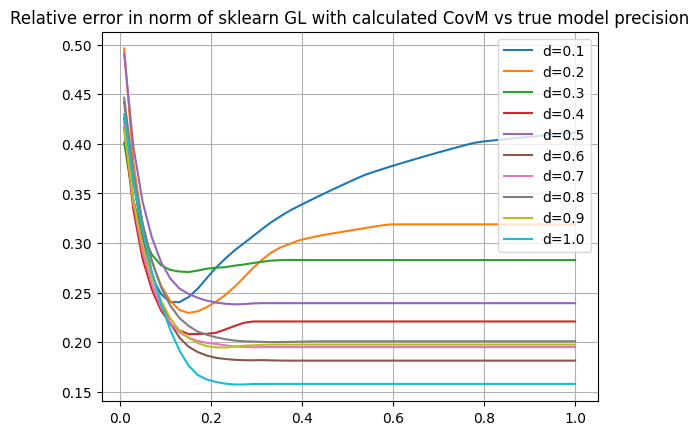

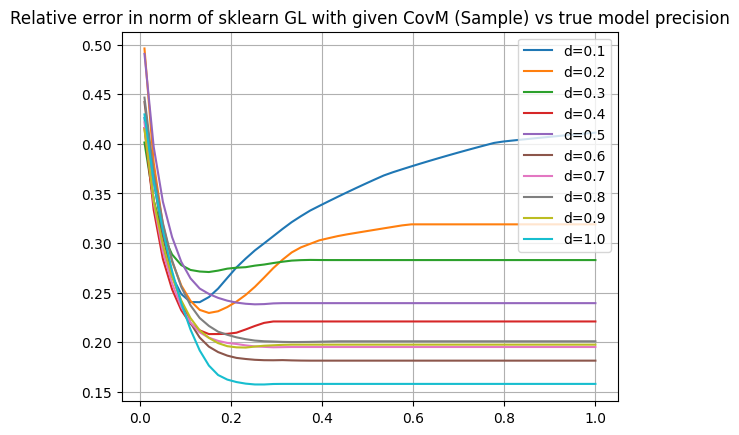

In [8]:
res = defaultdict(list)

for density in tqdm(densities):
    model = DiagDominantPcorrModel(N, density)
    data = model.sample(n)

    for reg_param in lambdas:      
        prev_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
        curr_lasso = graphical_lasso(cov, reg_param, max_iter=1000)

        algorithm_error = np.linalg.norm(curr_lasso[1] - prev_lasso.get_precision()) / np.linalg.norm(curr_lasso[1])
        prev_error_vs_true = np.linalg.norm(prev_lasso.get_precision() - model.precision) / np.linalg.norm(prev_lasso.get_precision())
        curr_error_vs_true = np.linalg.norm(curr_lasso[1] - model.precision) / np.linalg.norm(curr_lasso[1])

        res[density].append((algorithm_error, prev_error_vs_true, curr_error_vs_true))
    
for density in densities:
    y = [res[density][idx][0] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs sklearn GL with given CovM (Sample)')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][1] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][2] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with given CovM (Sample) vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

100%|██████████| 10/10 [00:03<00:00,  2.97it/s]


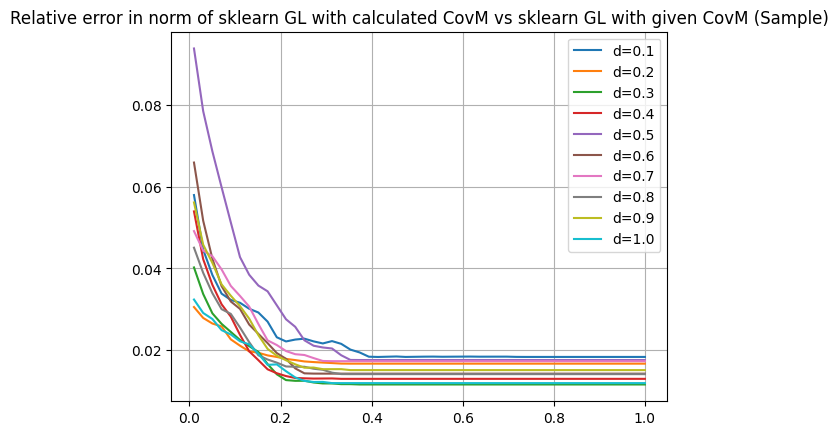

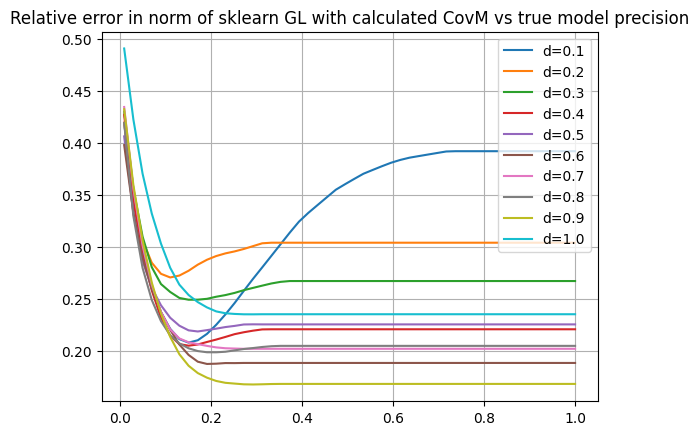

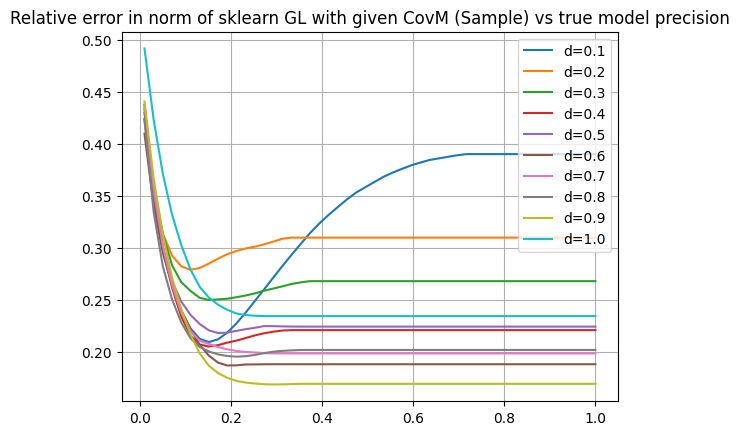

In [12]:
res = defaultdict(list)

for density in tqdm(densities):
    model = DiagDominantPcorrModel(N, density)
    data = model.sample(n)

    for reg_param in lambdas:      
        prev_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        cov = np.cov(data.T)
        curr_lasso = graphical_lasso(cov, reg_param, max_iter=1000)

        algorithm_error = np.linalg.norm(curr_lasso[1] - prev_lasso.get_precision()) / np.linalg.norm(curr_lasso[1])
        prev_error_vs_true = np.linalg.norm(prev_lasso.get_precision() - model.precision) / np.linalg.norm(prev_lasso.get_precision())
        curr_error_vs_true = np.linalg.norm(curr_lasso[1] - model.precision) / np.linalg.norm(curr_lasso[1])

        res[density].append((algorithm_error, prev_error_vs_true, curr_error_vs_true))
    
for density in densities:
    y = [res[density][idx][0] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs sklearn GL with given CovM (Sample)')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][1] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][2] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with given CovM (Sample) vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

Summary:
- Output of these two algorithms are identical
- Relative error of identified precision vs true precision is identical for two algorithms

# Test 2
Comparison of previous GL algorithm that estimates covariance by itself and current GL algorithm that recieves true model covariance in terms of:
- Relative error in Frobenius norm between two estimated precision matrices.
- Relative error in Frobenius norm between estimated and true precision matrices.

  0%|          | 0/10 [00:00<?, ?it/s]/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: O

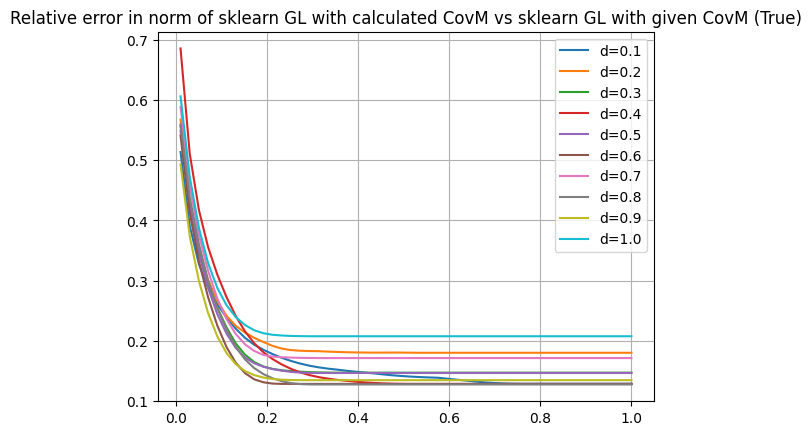

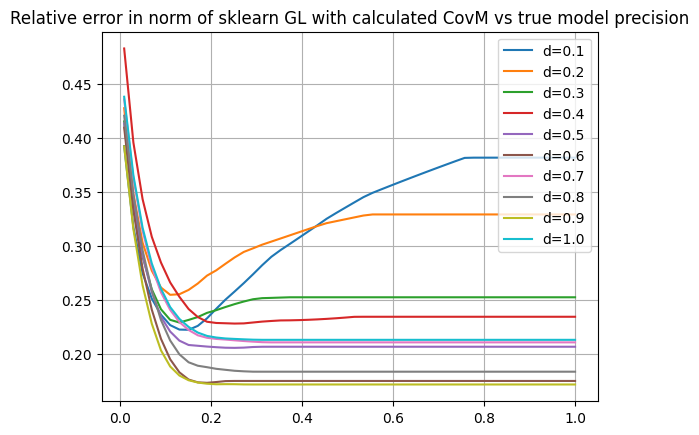

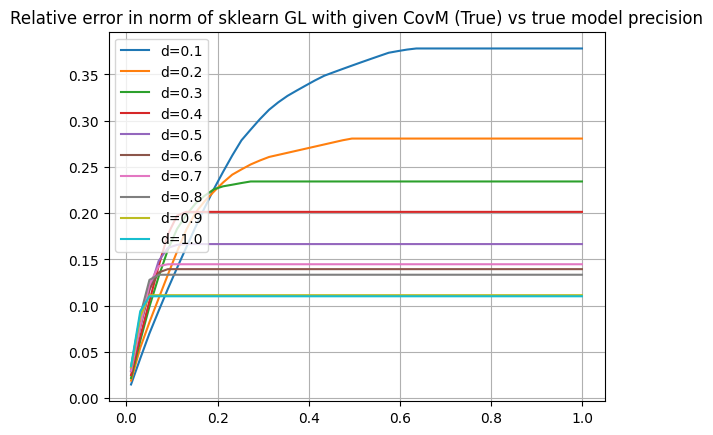

In [9]:
res = defaultdict(list)

for density in tqdm(densities):
    model = DiagDominantPcorrModel(N, density)
    data = model.sample(n)

    for reg_param in lambdas:      
        prev_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        #cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
        curr_lasso = graphical_lasso(model.covariance, reg_param, max_iter=1000)

        algorithm_error = np.linalg.norm(curr_lasso[1] - prev_lasso.get_precision()) / np.linalg.norm(curr_lasso[1])
        prev_error_vs_true = np.linalg.norm(prev_lasso.get_precision() - model.precision) / np.linalg.norm(prev_lasso.get_precision())
        curr_error_vs_true = np.linalg.norm(curr_lasso[1] - model.precision) / np.linalg.norm(curr_lasso[1])

        res[density].append((algorithm_error, prev_error_vs_true, curr_error_vs_true))
    
for density in densities:
    y = [res[density][idx][0] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs sklearn GL with given CovM (True)')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][1] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][2] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with given CovM (True) vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

Summary:
- Current GL trained on true covariance gives more accurate result in terms of relative error with true precision matrix.

# Test 3
Comparison of previous GL algorithm that estimates covariance by itself and current GL algorithm that recieves Ledoit-Wolf estimation of covariance in terms of:
- Relative error in Frobenius norm between two estimated precision matrices.
- Relative error in Frobenius norm between estimated and true precision matrices.

  0%|          | 0/10 [00:00<?, ?it/s]/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: O

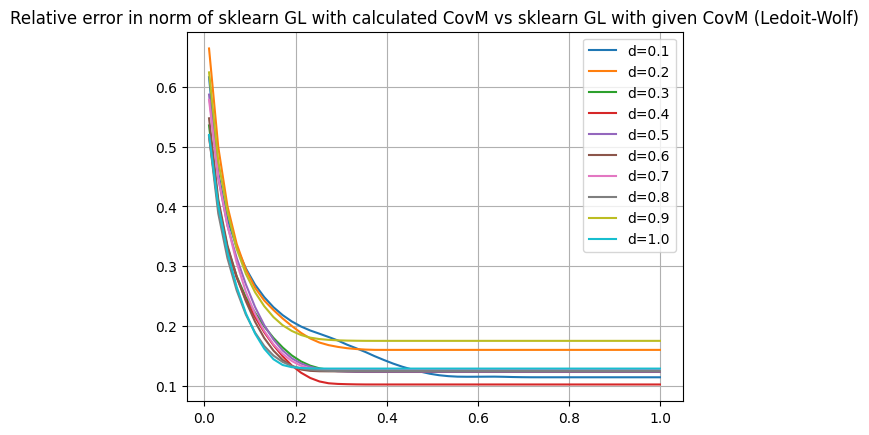

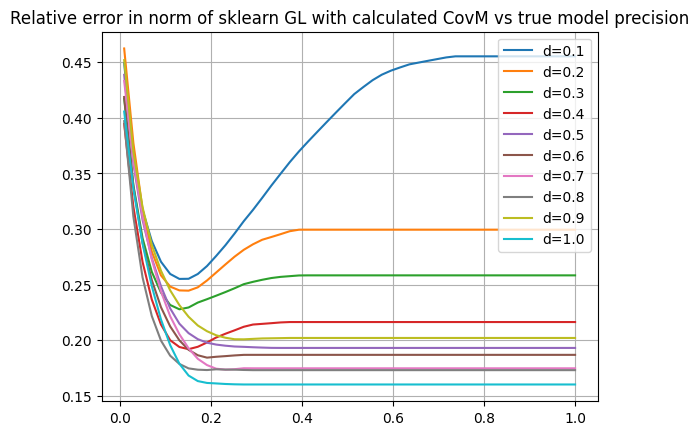

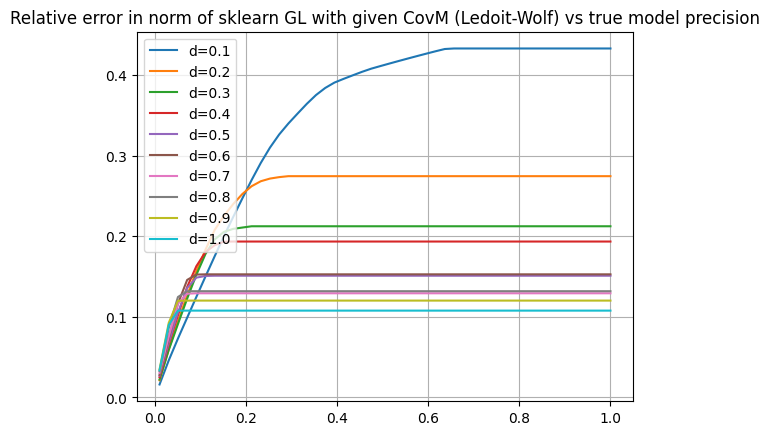

In [10]:
res = defaultdict(list)

for density in tqdm(densities):
    model = DiagDominantPcorrModel(N, density)
    data = model.sample(n)

    for reg_param in lambdas:      
        prev_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        cov = LedoitWolf(assume_centered=True).fit(data).covariance_
        curr_lasso = graphical_lasso(model.covariance, reg_param, max_iter=1000)

        algorithm_error = np.linalg.norm(curr_lasso[1] - prev_lasso.get_precision()) / np.linalg.norm(curr_lasso[1])
        prev_error_vs_true = np.linalg.norm(prev_lasso.get_precision() - model.precision) / np.linalg.norm(prev_lasso.get_precision())
        curr_error_vs_true = np.linalg.norm(curr_lasso[1] - model.precision) / np.linalg.norm(curr_lasso[1])

        res[density].append((algorithm_error, prev_error_vs_true, curr_error_vs_true))
    
for density in densities:
    y = [res[density][idx][0] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs sklearn GL with given CovM (Ledoit-Wolf)')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][1] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with calculated CovM vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

for density in densities:
    y = [res[density][idx][2] for idx in range(len(lambdas))]
    plt.plot(lambdas, y, label=f'd={np.around(density, 1)}')
plt.title('Relative error in norm of sklearn GL with given CovM (Ledoit-Wolf) vs true model precision')
plt.grid(True)
plt.legend()
plt.show()

Summary: Ledoit-Wolf shrinkage gives more precise covariance estimation than empirical covariance but less precise than true covariance.